<a href="https://colab.research.google.com/github/jackyt0303/html-portfolio/blob/main/CVNLP_transferred_learning_x_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow_datasets as tfds
from keras.utils import to_categorical
import zipfile
import os
import pandas as pd
import numpy as np

Convert datasets into Tensor



In [4]:
#extract zipfile

zip_file_name = 'CVNLPdataset.zip'

extract_path = '/content/extracted_files/'

with zipfile.ZipFile(zip_file_name,'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [5]:
dataset_path = os.listdir('/content/extracted_files/CVNLPdataset')

class_types = os.listdir('/content/extracted_files/CVNLPdataset')
print (class_types)
print("Types of class found: ", len(dataset_path))

['Background', 'Animal']
Types of class found:  2


In [6]:
classes_types = [item for item in dataset_path if os.path.isdir(os.path.join( '/content/extracted_files/CVNLPdataset', item))]

# Initialize the list to store class items
classes = []

# Iterate through each class directory and its items
for item in classes_types:
    class_items = os.listdir(os.path.join( '/content/extracted_files/CVNLPdataset', item))

    # Append class items to the 'classes' list along with their corresponding class type
    for class_item in class_items:
        classes.append((os.path.join( '/content/extracted_files/CVNLPdataset', item, class_item),item))

# Print the classes list to verify the results
print("Classes and their items:")
print(classes)


Classes and their items:
[('/content/extracted_files/CVNLPdataset/Background/farm109.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm107.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm91.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm3.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm45.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm16.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm71.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm56.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm112.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm90.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm76.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Background/farm10.jpg', 'Background'), ('/content/extracted_fil

Create Train&Test datasets

In [7]:
import random
from sklearn.model_selection import train_test_split

In [27]:
# X_train, X_test, Y_train, Y_test = train_test_split(classes_df, test_size=0.2, random_state=42)
train_data, test_data = train_test_split(classes, test_size=0.2)

In [28]:
print(len(train_data))
print(test_data)


864
[('/content/extracted_files/CVNLPdataset/Animal/animal11777.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11894.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11518.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11822.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal10969.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11092.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11227.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11877.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11365.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11135.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Animal/animal11248.JPEG', 'Animal'), ('/content/extracted_files/CVNLPdataset/Background/farm45.jpg', 'Background'), ('/content/extracted_files/CVNLPdataset/Animal/animal11604.JPEG', 'An

In [10]:
import torch
import cv2
import matplotlib.pyplot as plt
import keras.utils as ku
from sklearn.preprocessing import LabelEncoder


Convert train & test labels to one-hot encoded matrix

In [29]:

train_labels = []
test_labels = []

for i in range(len(train_data)):
  train_labels.append(train_data[i][1])

for i in range(len(test_data)):
  test_labels.append(test_data[i][1])

label_encoder = LabelEncoder()

train_labels_int = label_encoder.fit_transform(train_labels)
train_labels_fin =  ku.to_categorical(train_labels_int,num_classes=2)

test_labels_int = label_encoder.fit_transform(test_labels)
test_labels_fin =  ku.to_categorical(test_labels_int,num_classes=2)


In [30]:

train_img_ts = []
test_img_ts = []

#convert image to tensor for train datasets
for i in range(len(train_data)):
  image = cv2.imread(train_data[i][0])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  # Resize the images to pretrained VGG16's preferred size
  resized_img = cv2.resize(image,(224,224))

  # add it into train_img_ts
  train_img_ts.append(resized_img)


#convert image to tensor for train datasets
for i in range(len(test_data)):
  image = cv2.imread(test_data[i][0])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  # Resize the images to pretrained VGG16's preferred size
  resized_img = cv2.resize(image,(224,224))

  # add it into train_img_ts
  test_img_ts.append(resized_img)

In [31]:
#change image type to np.array
train_img_ts = np.array(train_img_ts)

train_img_ts = train_img_ts.astype('float32') / 255.0
train_img_ts.shape


(864, 224, 224, 3)

In [32]:
#change image type to np.array

test_img_ts = np.array(test_img_ts)

test_img_ts = test_img_ts.astype('float32') / 255.0
test_img_ts.shape

(216, 224, 224, 3)

In [33]:
train_labels_fin.shape

(864, 2)

In [34]:
import tensorflow as tf

print(tf.__version__)

2.14.0


Begin Training:

In [23]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [24]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False ## Not trainable weights

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [35]:

from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_img_ts, train_labels_fin, validation_split= 0.2,epochs=5, batch_size=16, callbacks=[es])

Epoch 1/5
44/44 [==============================] - 6s 96ms/step - loss: 0.2755 - accuracy: 0.9001 - val_loss: 0.1021 - val_accuracy: 0.9538
Epoch 2/5
44/44 [==============================] - 4s 84ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.1690 - val_accuracy: 0.9191
Epoch 3/5
44/44 [==============================] - 4s 87ms/step - loss: 0.0154 - accuracy: 0.9986 - val_loss: 0.0628 - val_accuracy: 0.9653
Epoch 4/5
44/44 [==============================] - 4s 98ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9769
Epoch 5/5
44/44 [==============================] - 4s 97ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9653


In [36]:
loss, accuracy = model.evaluate(test_img_ts, test_labels_fin)

print("Loss :", loss)
print("Accuracy: ", accuracy)

7/7 [==============================] - 9s 696ms/step - loss: 0.0697 - accuracy: 0.9769
Loss : 0.06966928392648697
Accuracy:  0.9768518805503845


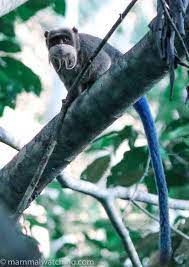

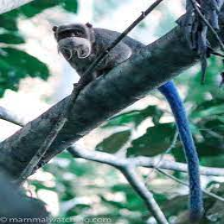

(224, 224, 3)

In [55]:
from google.colab.patches import cv2_imshow
#manual testing
path="/content/animal11882.JPEG"

imaget = cv2.imread(path)
imaget = cv2.cvtColor(imaget,cv2.COLOR_BGR2RGB)


# Resize the images to pretrained VGG16's preferred size
m_test = cv2.resize(imaget,(224,224))

# # add it into train_img_ts
# train_img_ts.append(resized_imgt)
cv2_imshow(imaget)
cv2_imshow(m_test)
m_test.shape

In [50]:
#change image type to np.array
# train_img_ts = np.array(train_img_ts)

m_test = m_test.astype('float32') / 255.0
m_test.shape


NameError: ignored

In [64]:
path_ani="/content/animal11883.JPEG"
path_back="/content/farm82.jpg"
# Load the image
image = cv2.imread(path_ani)

# Resize the image to the expected shape
image = cv2.resize(image, (224, 224))

# Convert the image to a NumPy array
image = image.astype('float32') / 255.0

# Add an extra dimension to the image
image = np.expand_dims(image, axis=0)

# Make a prediction on the image
prediction = model.predict(image)

# Print the prediction
print(prediction)

probabilities = prediction * 100

# Add the labels for each class
labels = ["aboreal ", "background"]

# Show the model prediction in a more human readable way
print("Model prediction:")
for i in range(len(labels)):
    print(f"{labels[i]}: {probabilities[0][i]:.2f}%")

1/1 [==============================] - 0s 20ms/step
[[9.9999976e-01 1.9266776e-07]]
Model prediction:
aboreal : 100.00%
background: 0.00%


In [56]:
model.predict(m_test)

ValueError: ignored